# Baseball Case Study

## Import necessary libaraies

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features-
 1. W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was  pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
 
 2. R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
 
 3. AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
 
 4. H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
 
 5. 2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
 
 6. 3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
 
 7. HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
 
 8. BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
 
 9. SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
 
 10. SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
 
 11. RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
 
 12. ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
 
 13. ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
 
 14. CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
 
 15. SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
 
 16. SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
 
 17. E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

-- Output: Number of predicted wins (W)
To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics


## Import the dataset

In [53]:
# Importing dataset into dataframe
df = pd.read_csv('baseball.csv')

In [54]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 30
No of Columns: 17


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


This dataset contains 16 features which contains statistics summary of the Baseball players and the 'W' (wins) is the target variable which predicts the number of wins.
 * Input features in this dataset are : Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
 * Target features : Number of predicted wins (W)

In [55]:
# Checking the columns of the dataset
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

**The column names present in our data that is not making much sense and will need deciphering to be converted into understandable format. In order to gain understanding of different columns in dataset, following baseball stastics terminology I get from Wikipedia..**
 
#### Pitching statistics:
 * W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work
 * RA – Run average: number of runs allowed times nine divided by innings pitched
 * ER – Earned run: number of runs that did not occur as a result of errors or passed balls
 * ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
 * CG – Complete game: number of games where player was the only pitcher for their team
 * SHO – Shutout: number of complete games pitched with no runs allowed. A starting pitcher is credited with a shutout when he pitches the entire game for a team and does not allow the opposition to score. By definition, any pitcher who throws a shutout is also awarded a win. 
 * SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

#### Batting statistics:

 * R – Runs scored: number of times a player crosses home plate
 * AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.  The number of times in which the hitter appeared at the plate and made a base hit, reached base on an error, or was out. 
 * H – Hit: reaching base because of a batted, fair ball without error by the defense
 * 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
 * 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
 * HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
 * BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter. After refraining from swinging at four pitches out of the zone, the batter is awarded first base. 
 * K – Strike out (also abbreviated SO): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base. It usually means the batter is out.

#### Base running statistics:

 * SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense.A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch, but it can also occur while the pitcher still has the ball or is attempting a pickoff, or as the catcher is throwing the ball back to the pitcher.
 * R – Runs scored: times reached home plate legally and safely

#### Fielding statistics:

 * E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result. An error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. 

**Now that we have clearer understanding on what the abbreviation mean and In order to simplify we are going to rename columns in dataset.**

In [56]:
# Rename the columns of the dataset to better understanding
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


## Exploratory Data Analysis (EDA)

In [57]:
# Checking the misisng values in the dataset
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

We can observe that there are no missing value in the dataset.

In [58]:
# Checking the name and its dtype and its count of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

We can observe that all the columns has int32 datatype only one column has float64 datatype.

In [59]:
# Checking the unique value of the columns
df.nunique().to_frame('No. of unique value')

,No. of unique value
Wins,24
Runs Scored,28
At Bat,29
Hits,29
Doubles,22
Triples,23
Home Runs,27
Base on Balls,29
Strike Outs,29
Stolen Base,27


In [60]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Wins
68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: count, dtype: int64


Runs Scored
689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: count, dtype: int64


At Bat
5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: count, dtype: int64


Hits
1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1

### Description of the dataset

In [61]:
# The statistical of the dataset
df.describe()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From the above describution we can observe the following :-

1. If we just look at mean and 50% columns for different feature we can see data is sightly right skew for most of features.
2.  Count is same for each variable.
3. 75% and max values for Errors, Shutout, Run Scored shows presence of possible outliers.
4. Overall all statstical parameter from mean to max, indicate  features are seem to be progressing in a definite manner showing no visible abnormalities.

## Data Visualization

### Univarite analysis

### Distribution of features

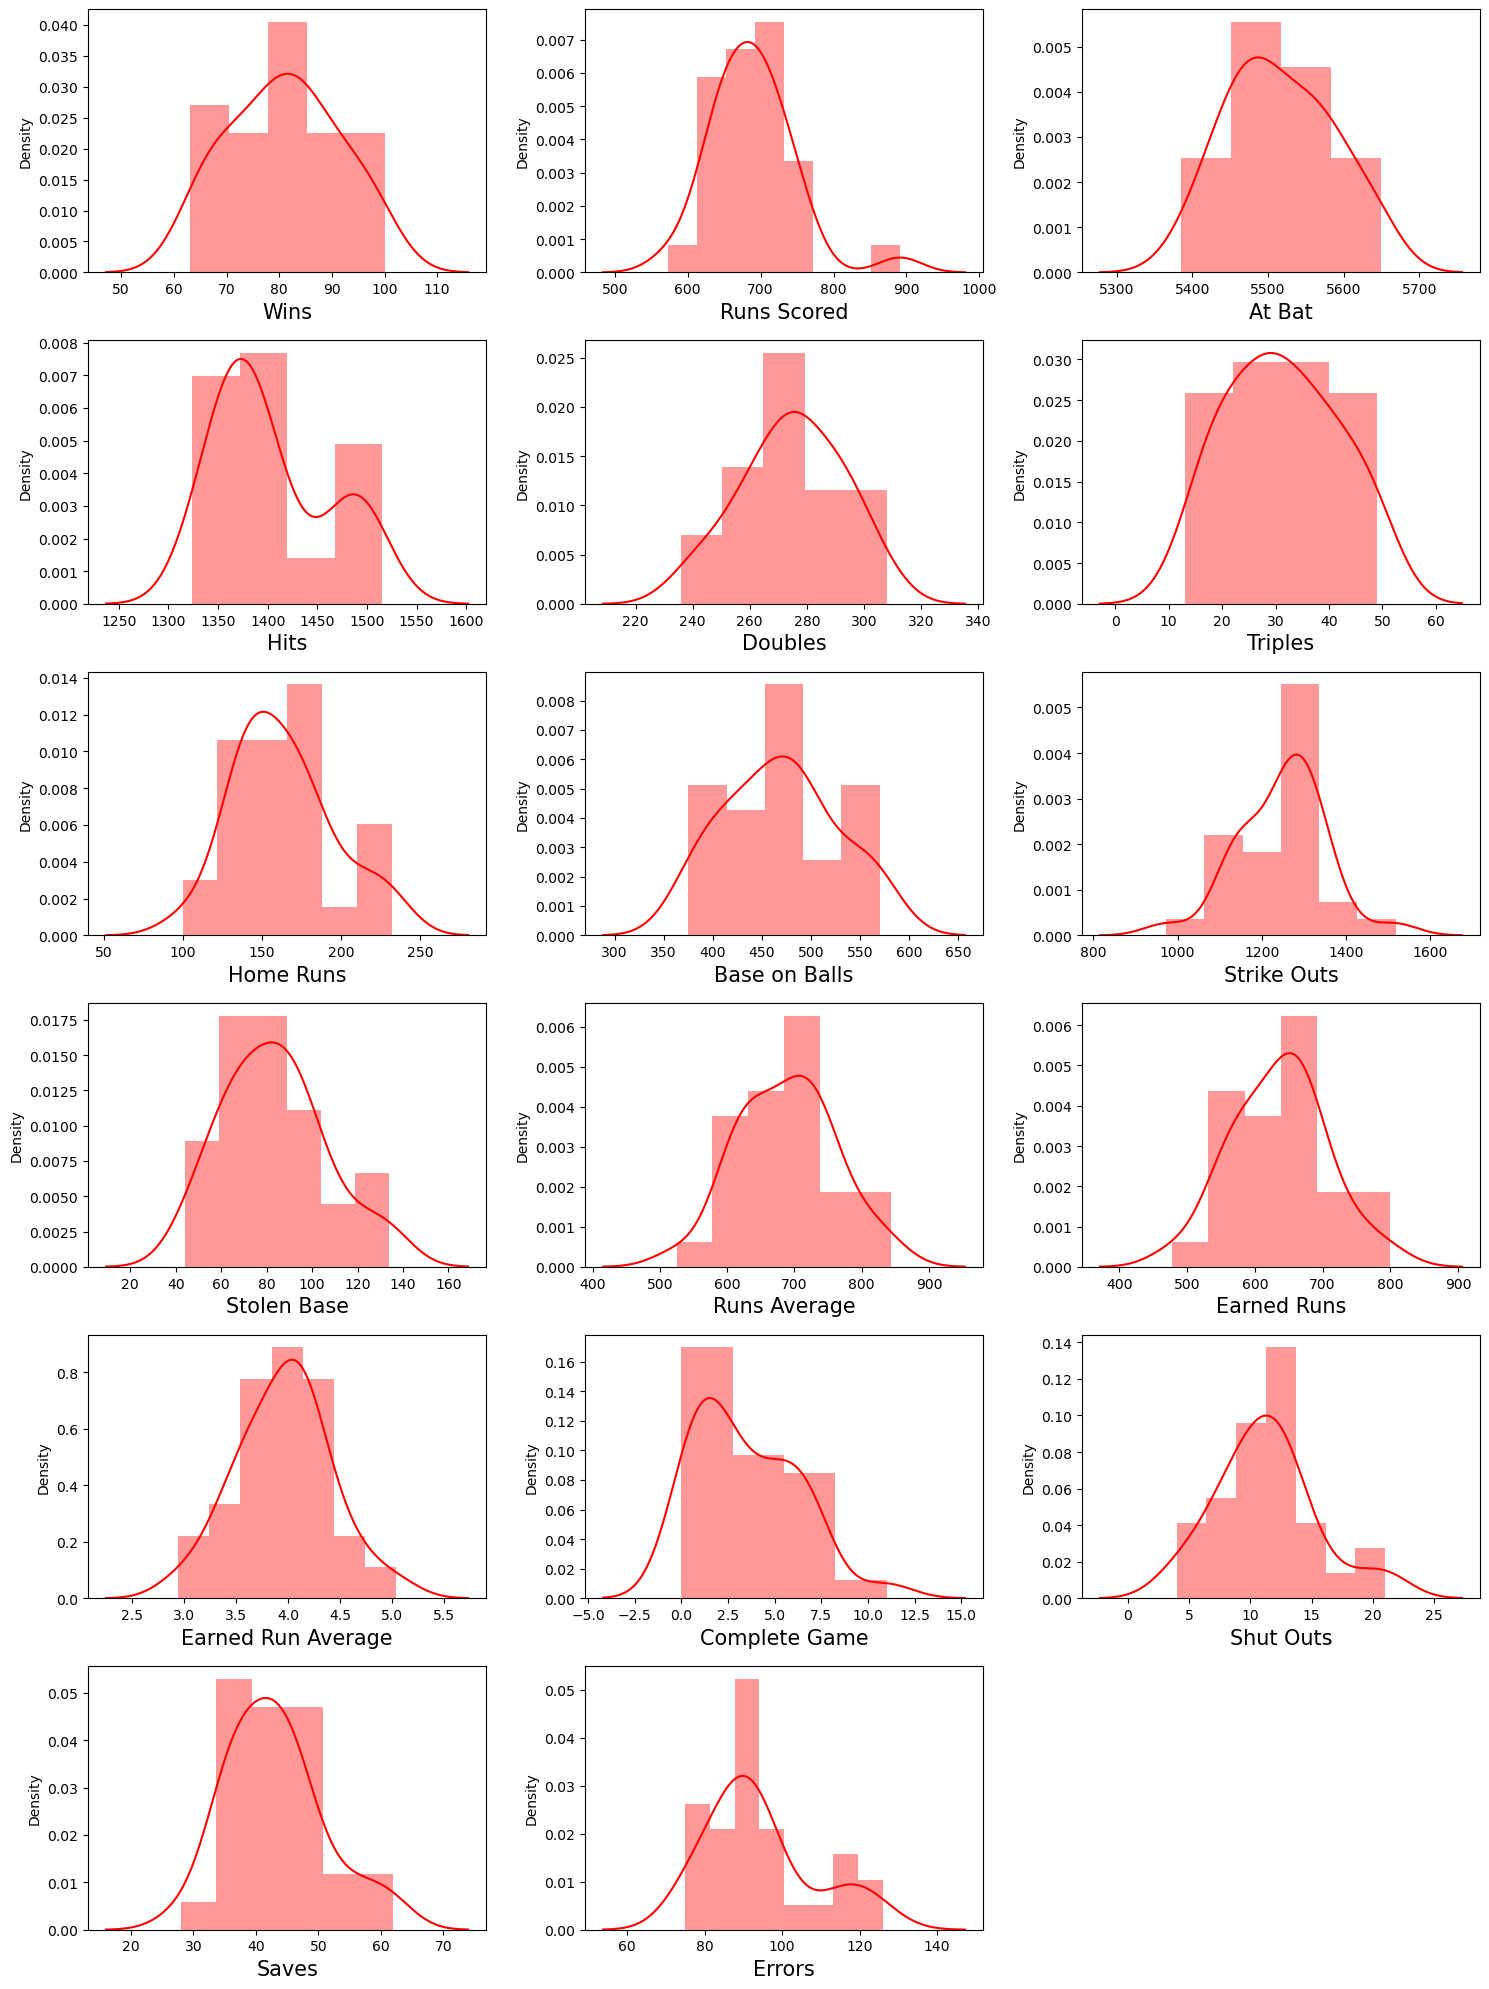

In [62]:
# Let's check how the data has been distirbuted of each columns using distplot
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that some of feature are either left or right skewed.

## Bivariate Analysis

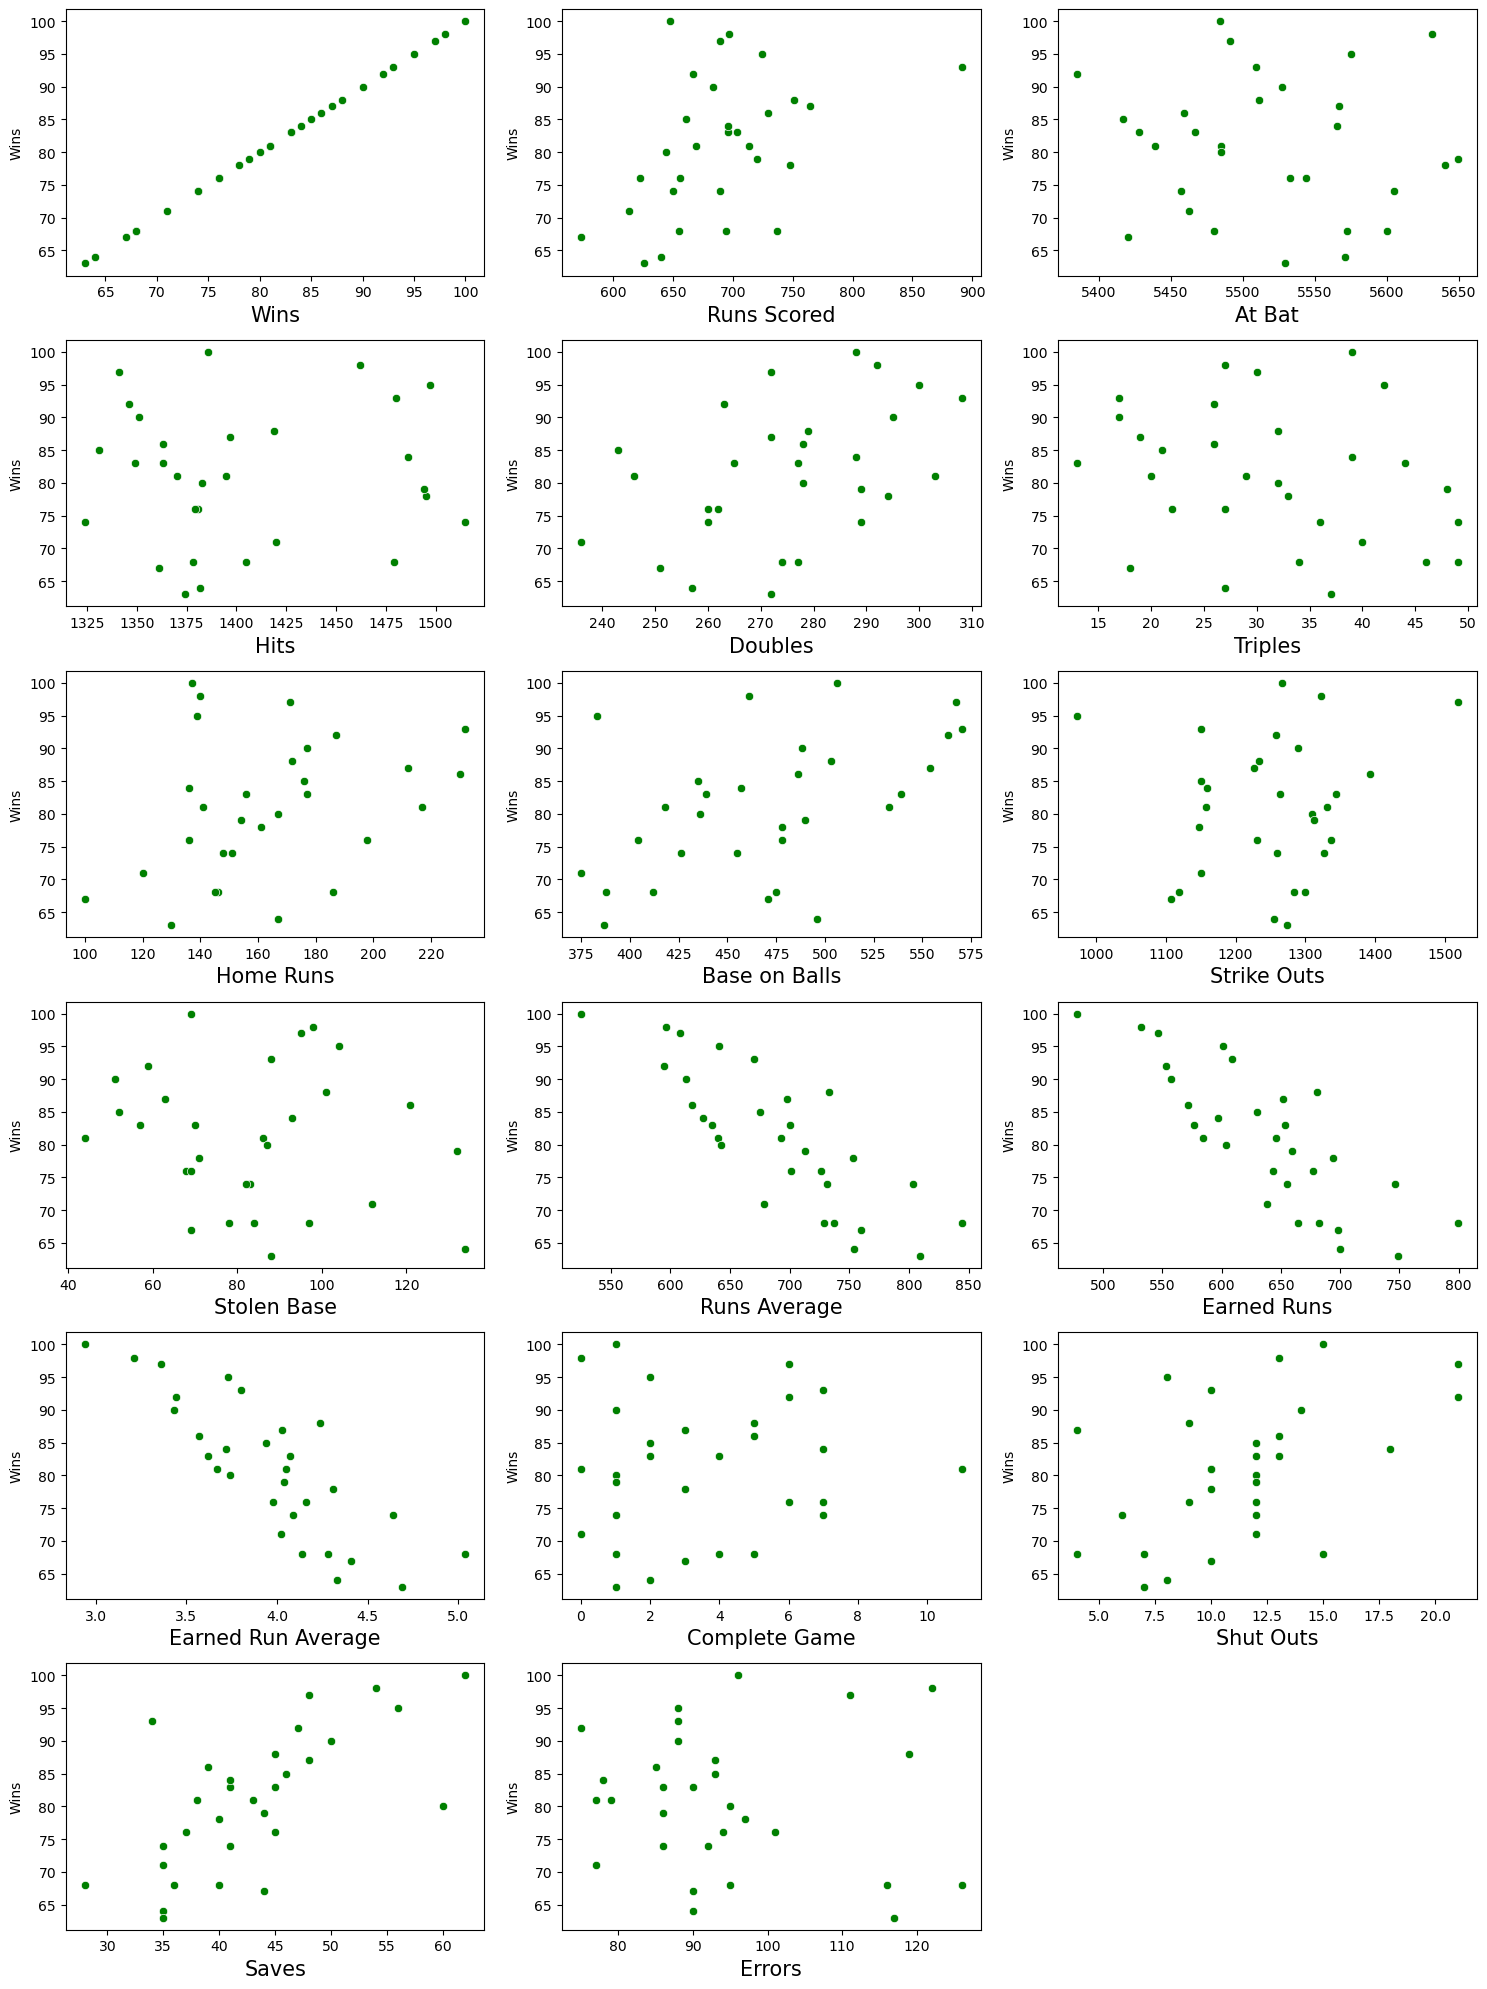

In [63]:
# Checking the relationship between features vs target columns
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.scatterplot(x=col,y='Wins',data=df,color='g')
        plt.xlabel(col,fontsize=15)
        plt.ylabel('Wins')
    plotnumber+=1
plt.tight_layout()

We can clearly see that Run Average, Earned Runs ,Earned Run Average has negative lienar relationship and Saves has negative linear relationship with target column.

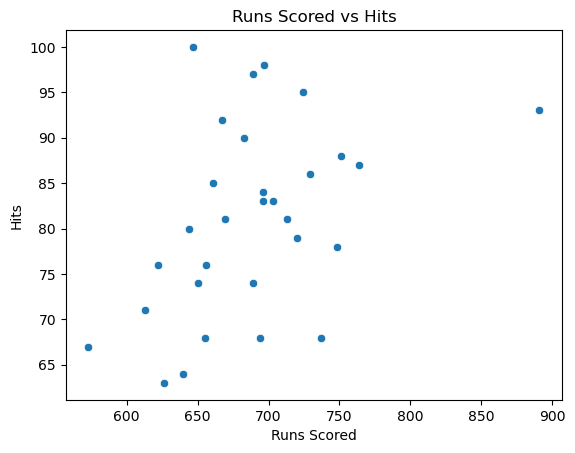

In [64]:
# Checking the relationship between Runs Scored and Hits
sns.scatterplot(x='Runs Scored',y = 'Wins',data=df)
plt.xlabel('Runs Scored')
plt.ylabel('Hits')
plt.title('Runs Scored vs Hits')
plt.show()

There are week linear relationship between Runs Scored vs Hits.

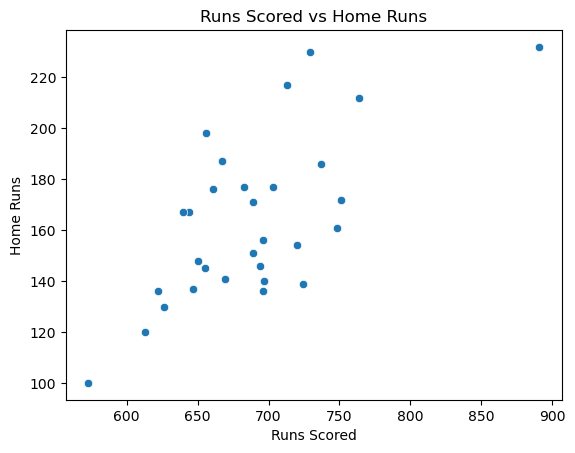

In [65]:
# Checking the relationship between Runs Scored and Hits
sns.scatterplot(x='Runs Scored',y = 'Home Runs',data=df)
plt.xlabel('Runs Scored')
plt.ylabel('Home Runs')
plt.title('Runs Scored vs Home Runs')
plt.show()

There are linear relationship between Runs Scored vs HomeRuns.

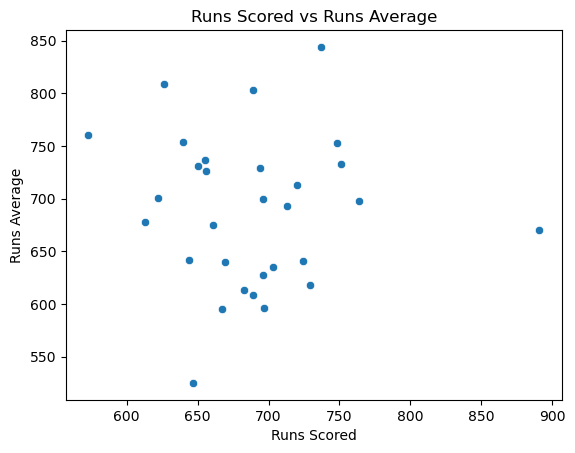

In [66]:
# Checking the relationship between Runs Scored and At Bat
sns.scatterplot(x='Runs Scored',y = 'Runs Average',data=df)
plt.xlabel('Runs Scored')
plt.ylabel('Runs Average')
plt.title('Runs Scored vs Runs Average')
plt.show()

There are no significant linear relationship between Runs Scored vs Runs Average.

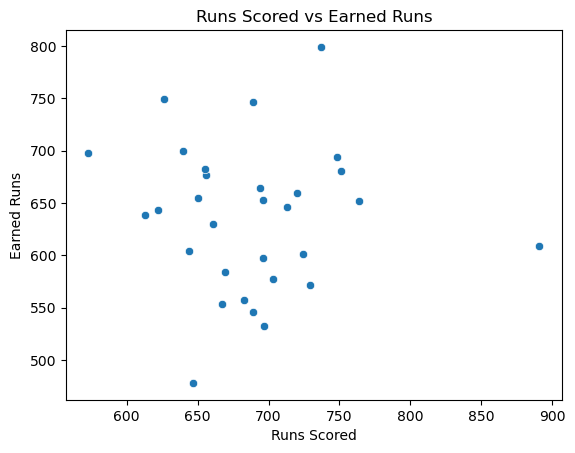

In [67]:
# Checking the relationship between Runs Scored and At Bat
sns.scatterplot(x='Runs Scored',y = 'Earned Runs',data=df)
plt.xlabel('Runs Scored')
plt.ylabel('Earned Runs')
plt.title('Runs Scored vs Earned Runs')
plt.show()

There are week linear relationship between Runs Scored Vs Earned Runs.

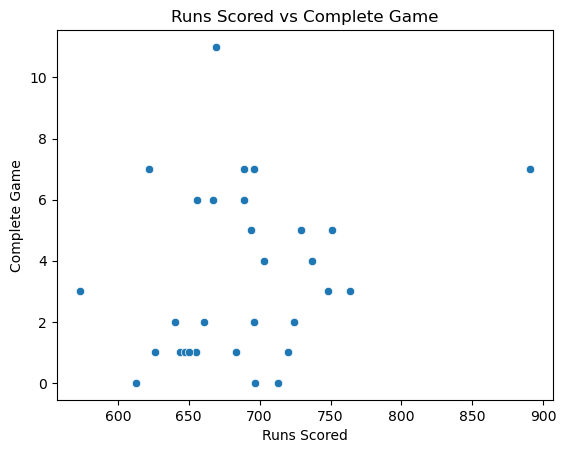

In [68]:
# Checking the relationship between Runs Scored and At Bat
sns.scatterplot(x='Runs Scored',y = 'Complete Game',data=df)
plt.xlabel('Runs Scored')
plt.ylabel('Complete Game')
plt.title('Runs Scored vs Complete Game')
plt.show()

There are no significant linear relationship between Runs Scored Complete Game.

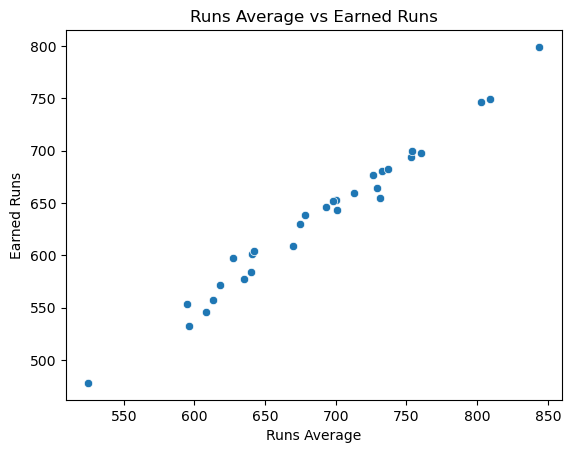

In [69]:
# Checking the relationship between Runs Scored and At Bat
sns.scatterplot(x='Runs Average',y = 'Earned Runs',data=df)
plt.xlabel('Runs Average')
plt.ylabel('Earned Runs')
plt.title('Runs Average vs Earned Runs')
plt.show()

There are strong linear relationship between Runs Average vs Earned Runs.

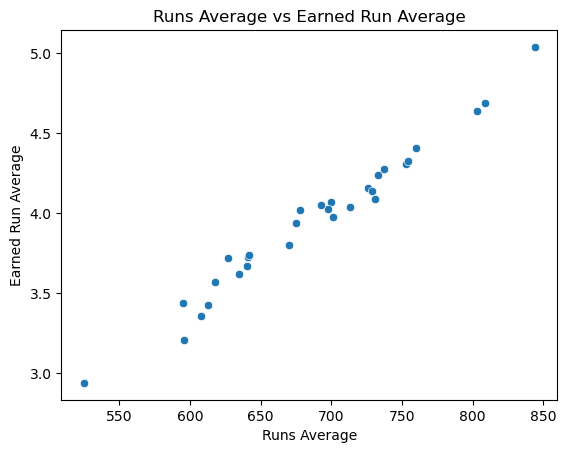

In [70]:
# Checking the relationship between Runs Scored and At Bat
sns.scatterplot(x='Runs Average',y = 'Earned Run Average',data=df)
plt.xlabel('Runs Average')
plt.ylabel('Earned Run Average')
plt.title('Runs Average vs Earned Run Average')
plt.show()

There are strong linear relationship between Runs Average vs Earned Runs Average.

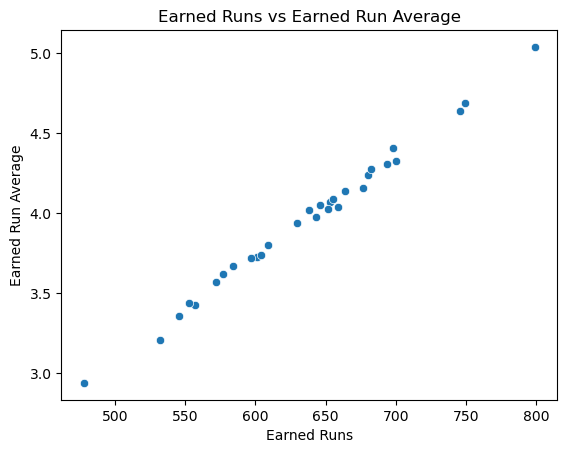

In [71]:
# Checking the relationship between Runs Scored and At Bat
sns.scatterplot(x='Earned Runs',y = 'Earned Run Average',data=df)
plt.xlabel('Earned Runs')
plt.ylabel('Earned Run Average')
plt.title('Earned Runs vs Earned Run Average')
plt.show()

There are strong linear relationship between Earned Runs vs Earned Run Average.

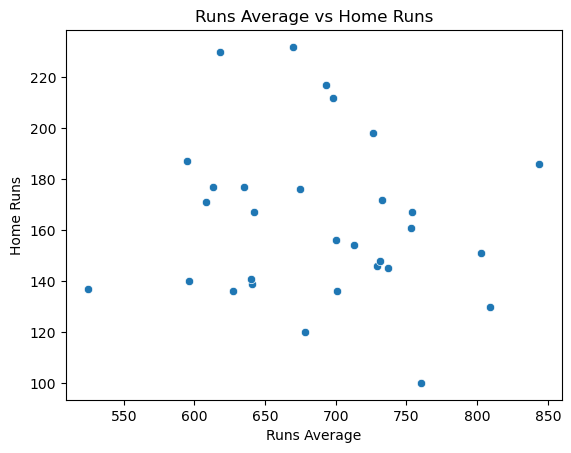

In [72]:
# Checking the relationship between Runs Scored and At Bat
sns.scatterplot(x='Runs Average',y = 'Home Runs',data=df)
plt.xlabel('Runs Average')
plt.ylabel('Home Runs')
plt.title('Runs Average vs Home Runs')
plt.show()

There are no significant linear relationship between Runs Average vs Homes runs

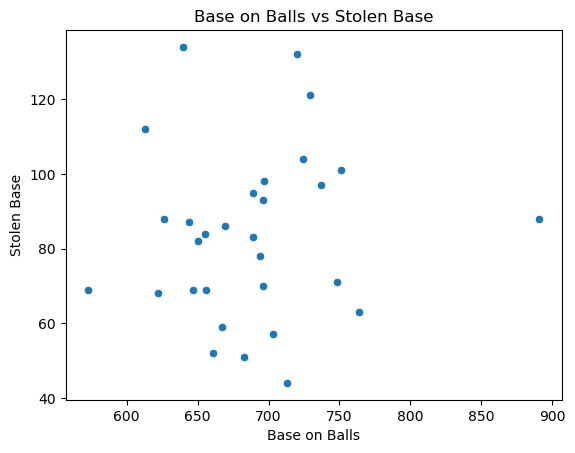

In [73]:
# Checking the relationship between Runs Scored and At Bat
sns.scatterplot(x='Runs Scored',y = 'Stolen Base',data=df)
plt.xlabel('Base on Balls')
plt.ylabel('Stolen Base')
plt.title('Base on Balls vs Stolen Base')
plt.show()

There are no significant linear relationship between Base on Balls vs Stolen Base

### Multivariate analysis

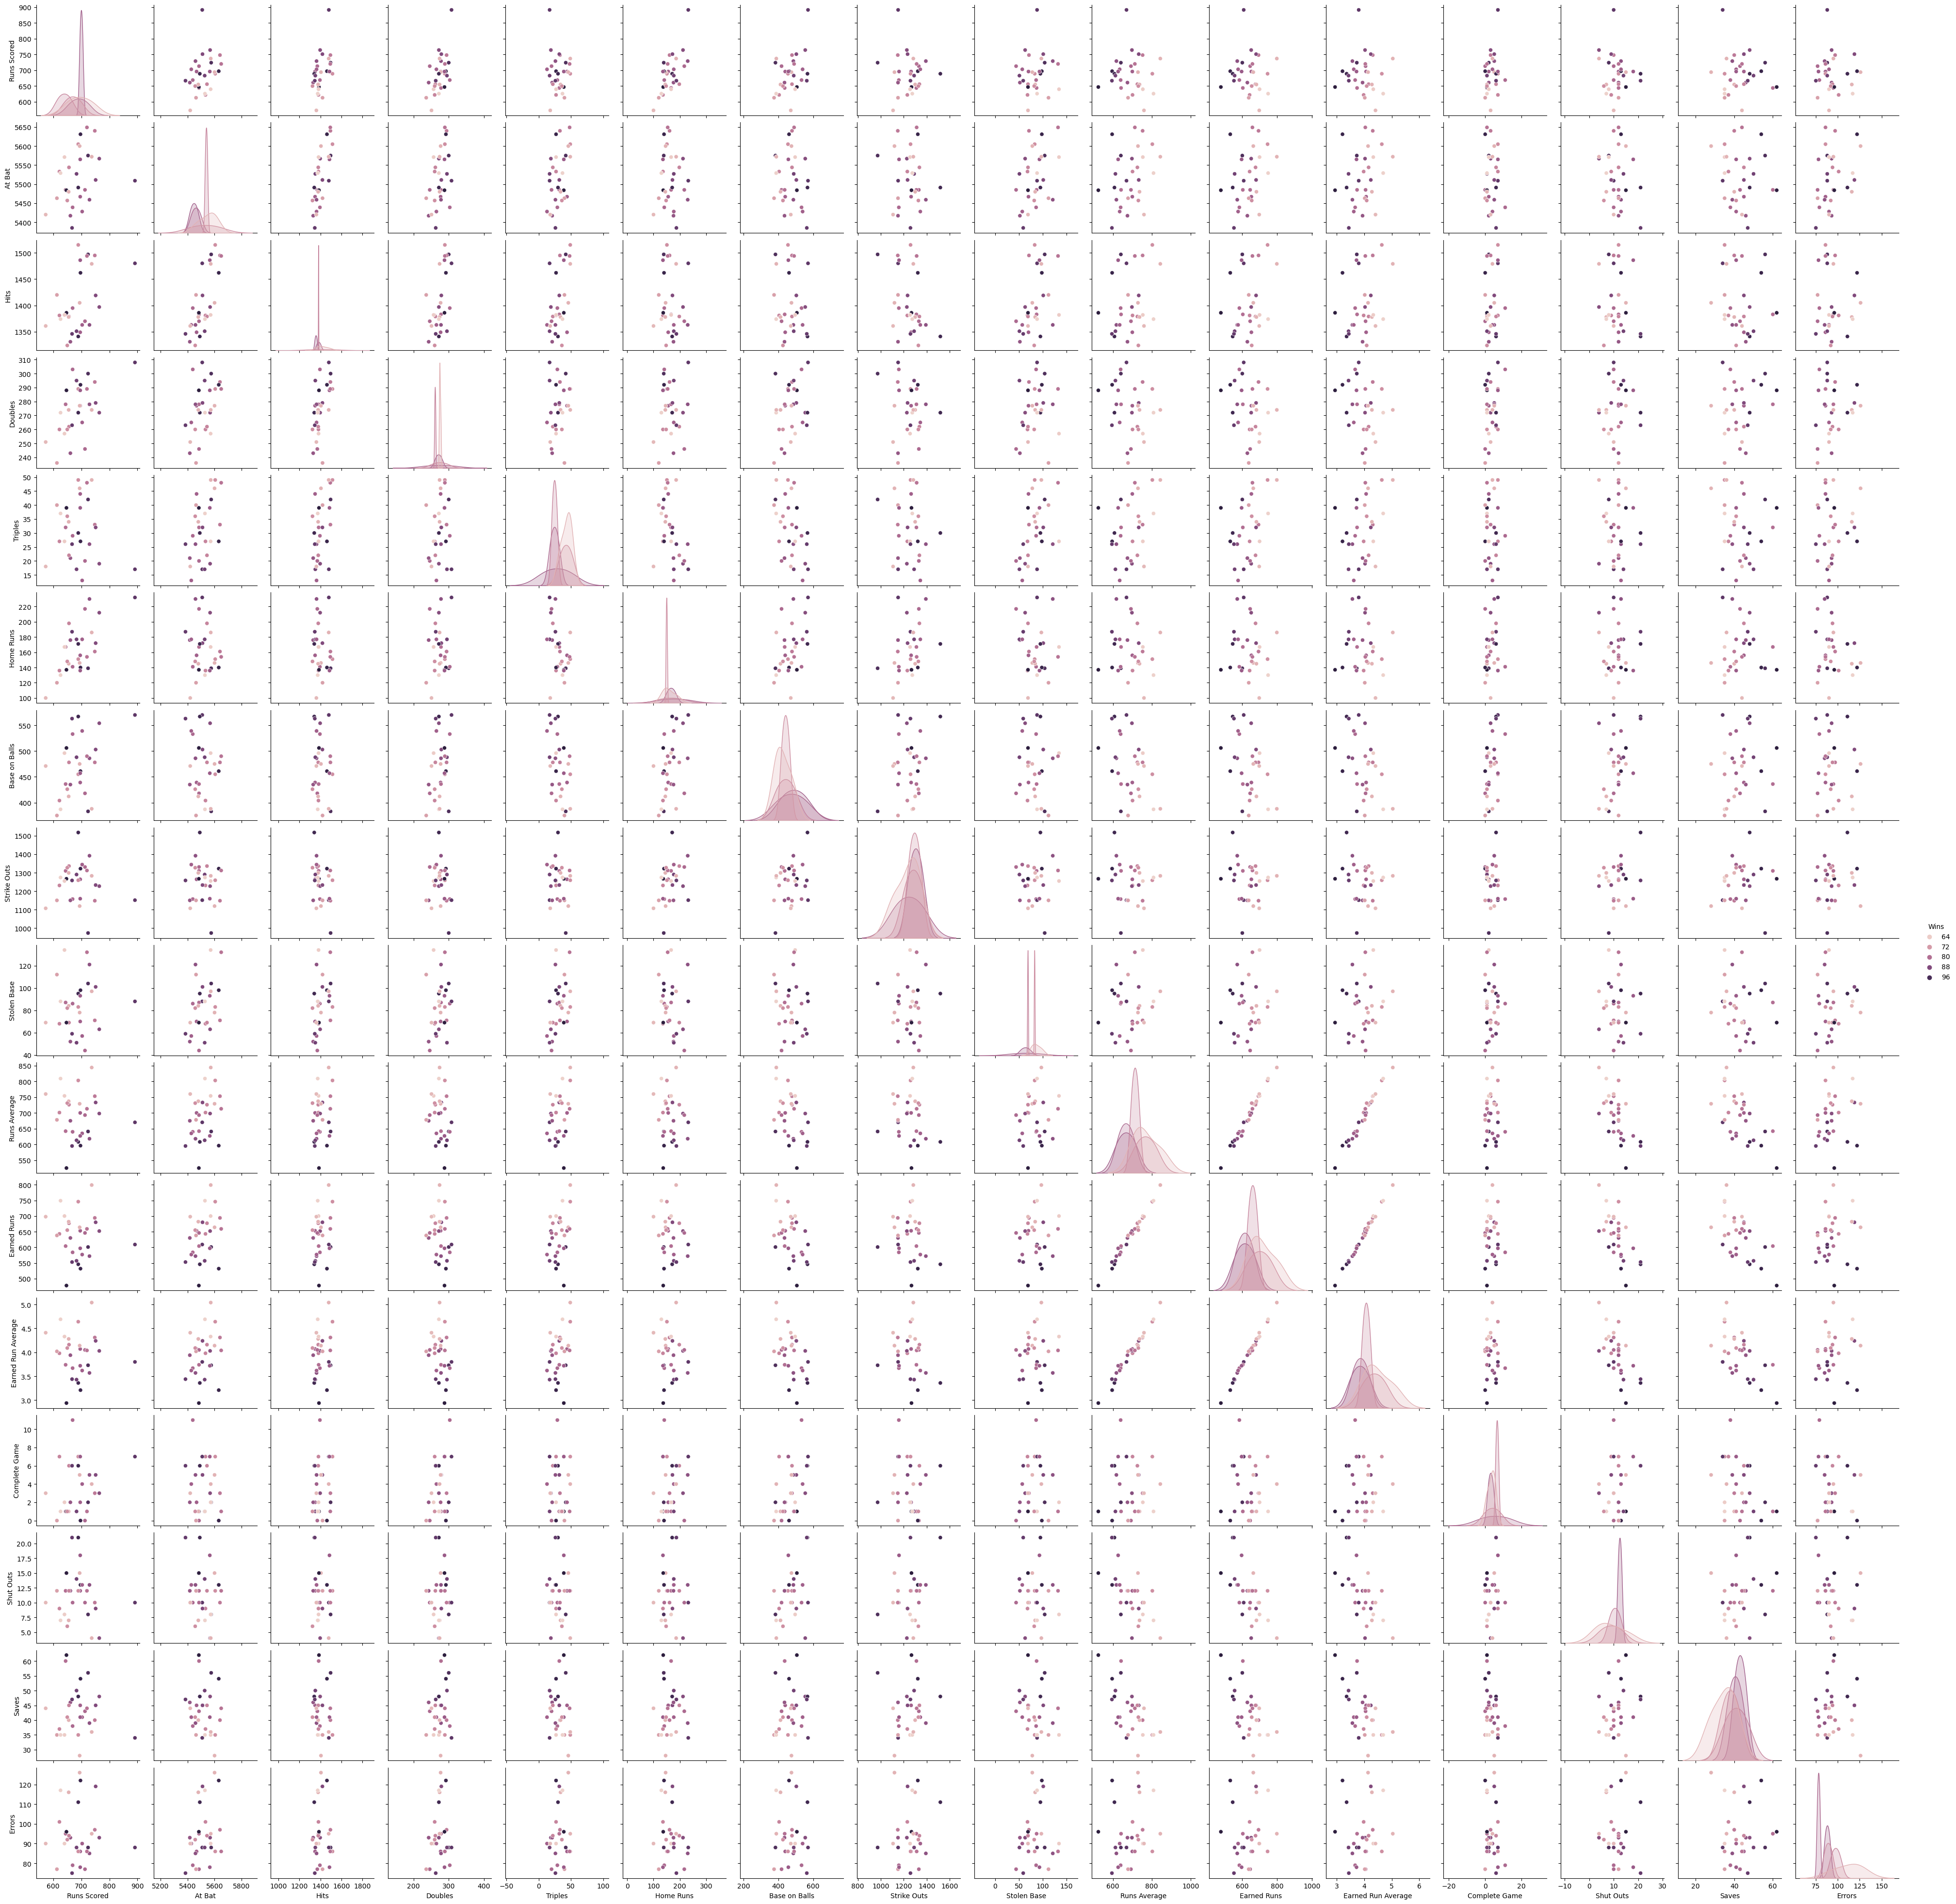

In [74]:
sns.pairplot(df,hue='Wins')

## Identify Outliers 

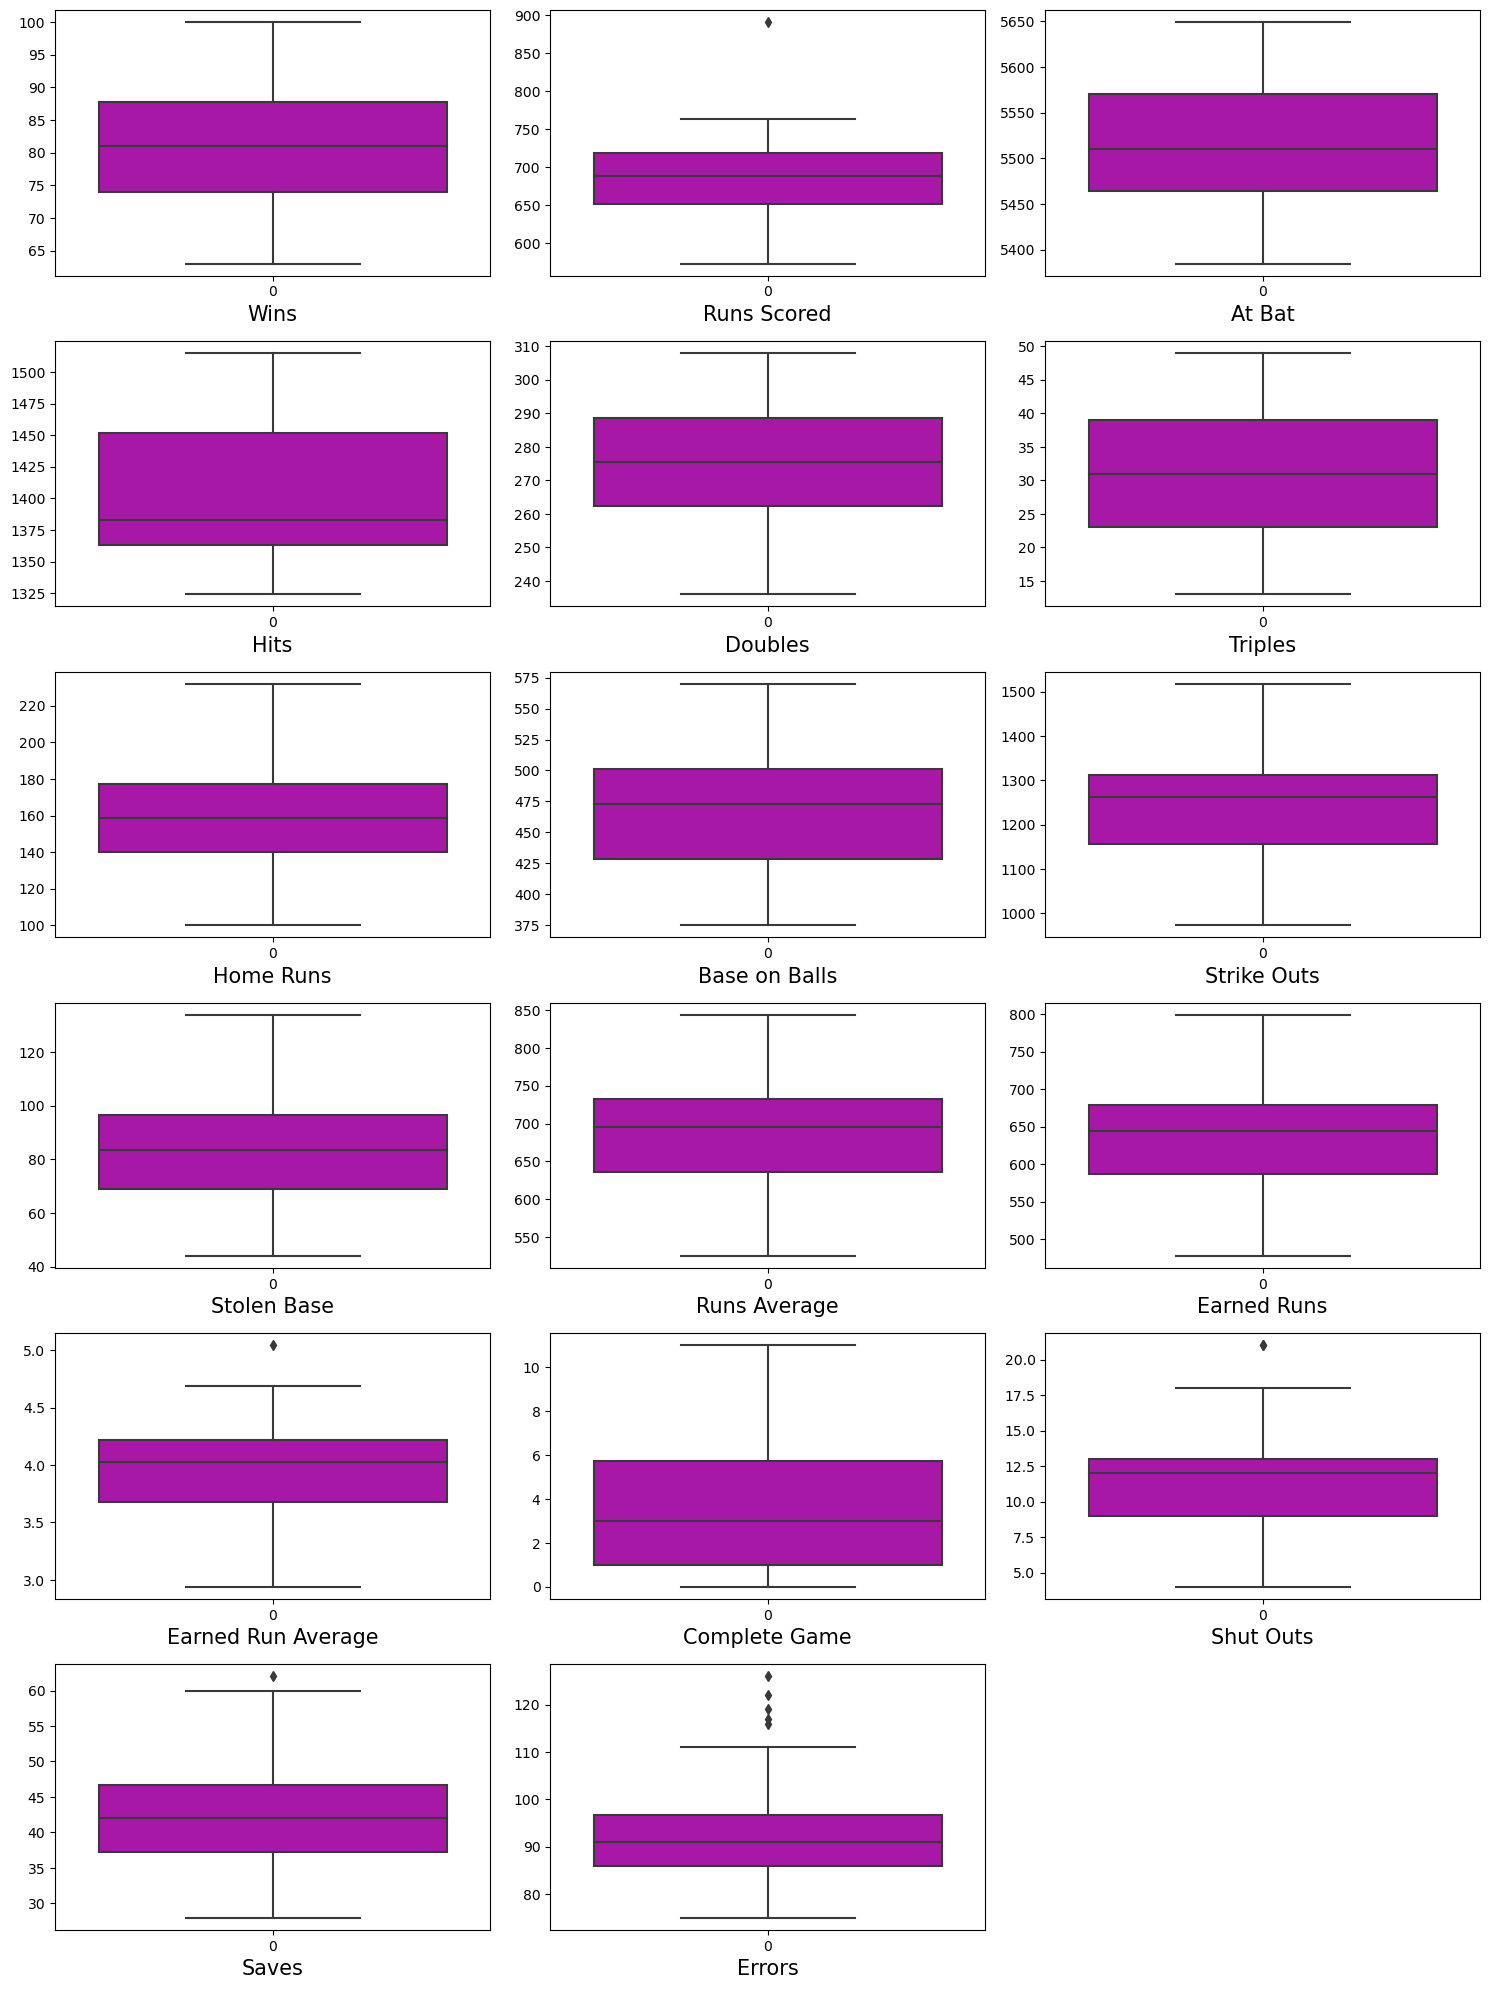

In [75]:
# Checking the outleirs using boxplot
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1

for col in df:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[col],color='m')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()

The columns Runs Scored, Earned Runs Average, Shut Outs, Saves and Errors has outliers so we need to remove outliers.

In [76]:
# Outliers Detection and Removal using zscore
from scipy.stats import zscore

df_feature = df[['Runs Scored','Earned Run Average','Shut Outs','Saves','Errors']]

z = np.abs(zscore(df_feature))

#Thresholds = 3
np.where(z>3)

(array([5], dtype=int64), array([0], dtype=int64))

In [77]:
df.iloc[5:6]

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


In [78]:
df1 = df[(z<3).all(axis=1)]

df1.shape

(29, 17)

In [79]:
print('The shape of the dataset before removing outliers :',df.shape)
print('The shape of the dataset after removing  outliers :',df1.shape)

print('\nPercentage Data Loss :',(df.shape[0]-df1.shape[0])/df.shape[0]*100)

The shape of the dataset before removing outliers : (30, 17)
The shape of the dataset after removing  outliers : (29, 17)

Percentage Data Loss : 3.3333333333333335


## Feature selection and Engineering

### Checking the skewness

In [80]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

 * Optimal range for skewness is -0.5 to 0.5.
 * Hits, Complete Game, Shuts Outs, Saves, Errors are positively Skewed in nature, need to transform.

### Removing the skewness

#### Transforming positive or right skew data using boxcox transformation

In [81]:
from scipy.stats import boxcox

In [82]:
df1['Hits'] = boxcox(df1['Hits'],-2)

In [83]:
df1['Shut Outs'] = boxcox(df1['Shut Outs'],0.5)

In [84]:
df1['Saves'] = boxcox(df1['Saves'],0.5)

**Other feature not able transform by Boxcox Method as they showing data must be positive. So others columns are transfrom using yeo-johnson method**

In [85]:
from sklearn.preprocessing import PowerTransformer
EC = ['Errors','Complete Game']

power = PowerTransformer()

df1[EC] = power.fit_transform(df1[EC].values)

df1.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,0.5,300,42,139,383,973,104,641,601,3.73,-0.307098,3.656854,12.966630,-0.348265
1,83,696,5467,0.5,277,44,156,439,1264,70,700,653,4.07,-0.307098,4.928203,11.416408,-0.540820
2,81,669,5439,0.5,303,29,141,533,1157,86,640,584,3.67,2.011315,4.324555,10.328828,-1.326125
3,76,622,5533,0.5,260,27,136,404,1231,68,701,643,3.98,1.264463,4.000000,10.165525,0.650818
4,74,689,5605,0.5,289,49,151,455,1259,83,803,746,4.64,1.264463,4.928203,9.832160,-0.540820


In [86]:
# Verify if skewness remove sucessfully
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.000000
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game        -0.045947
Shut Outs            -0.085802
Saves                 0.370280
Errors                0.065585
dtype: float64

This looks almost normal and skewness is also removed.

## Correlation

In [87]:
# Checking the correlation feature vs feature and feature vs target 
corr = df1.corr()

corr

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.025885,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.007696,0.477949,0.754886,-0.079633
Runs Scored,0.390451,1.000000,0.438022,0.429083,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.155122,-0.119300,0.071589,0.039865
At Bat,-0.085780,0.438022,1.000000,0.771485,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.059648,-0.193987,-0.127766,0.332002
Hits,-0.025885,0.429083,0.771485,1.000000,0.525668,0.574467,-0.219890,-0.220426,-0.375825,0.424369,0.241583,0.278600,0.254635,0.070020,-0.134500,-0.093443,-0.012712
Doubles,0.384886,0.469293,0.490752,0.525668,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.227220,0.088345,0.258675,0.152541
Triples,-0.206737,0.134204,0.445604,0.574467,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.004496,-0.067667,-0.236230,0.080498
Home Runs,0.245697,0.586894,-0.064653,-0.219890,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.118284,-0.030256,0.084263,-0.165883
Base on Balls,0.447513,0.258450,-0.137850,-0.220426,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.445335,0.434799,0.197177,-0.056106
Strike Outs,0.156469,0.081158,-0.111243,-0.375825,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.063129,0.200067,0.105667,0.164817
Stolen Base,-0.169503,0.075323,0.373674,0.424369,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.040524,-0.098740,-0.187605,0.070527


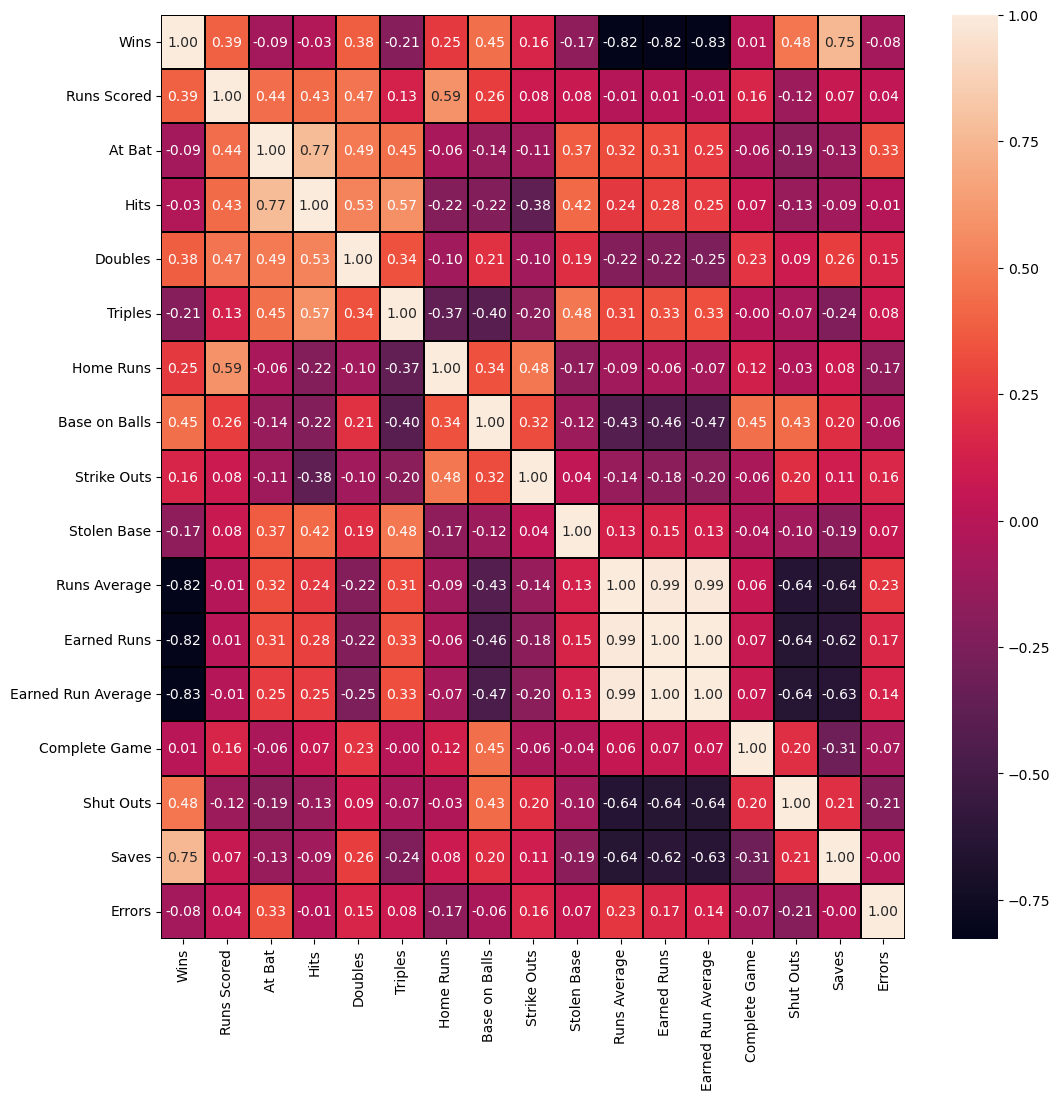

In [88]:
# Let's visualize the correlation using heatmap
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True, linewidths='0.1',linecolor='black',fmt='0.2f',annot_kws={'size':10})
plt.show()

This heatmap contains both positive and negative correlaton.

1. Hits, At bats, Complete game and errors are very poorly correlated with target variable.
2.  Saves, ERA,RA,EA are highly correleated with target variable.
3. here is visible multi colinearity between the feature columns "Earned Runs", "Earned Run Average" and "Runs Average". This need to check.

### checking the correlation features with target

In [89]:
# Checking the correlation feature with target 
corr['Wins'].drop('Wins').sort_values(ascending=True)

Earned Run Average   -0.826952
Runs Average         -0.823176
Earned Runs          -0.815308
Triples              -0.206737
Stolen Base          -0.169503
At Bat               -0.085780
Errors               -0.079633
Hits                 -0.025885
Complete Game         0.007696
Strike Outs           0.156469
Home Runs             0.245697
Doubles               0.384886
Runs Scored           0.390451
Base on Balls         0.447513
Shut Outs             0.477949
Saves                 0.754886
Name: Wins, dtype: float64

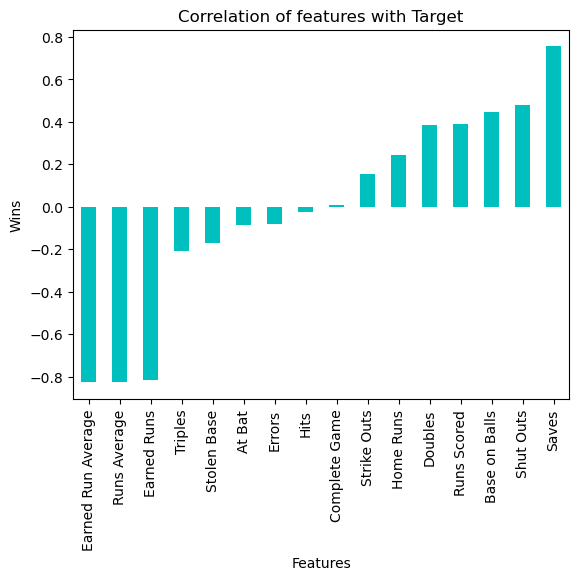

In [90]:
# Checking the correlation feature with target usgin barplot
corr['Wins'].drop('Wins').sort_values(ascending=True).plot(kind='bar',color='c')
plt.xlabel('Features')
plt.ylabel('Wins')
plt.title('Correlation of features with Target')
plt.show()

From the above bar plot we can notice the postive and negative correlation between features and target. Here Saves columns has high postive correlated with target and Earned Runs average, Runs Average, Earned Runs has high negative correlated with target. Hits and Complete Game has very less correlation with the target.

## Sparating feature and target

In [91]:
# Seprate the feature and target
x = df1.drop(columns=['Wins'],axis=1)
y = df1['Wins']

## Feature Scaling using Standard Scalarization

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.head()

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.692724,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.777436,1.602631,-0.348265
1,0.331147,-0.702831,-0.971360,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.247475,0.255621,-0.540820
2,-0.274666,-1.100253,-0.051994,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.239162,-0.689393,-1.326125
3,-1.329231,0.233951,-0.322098,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.500806,-0.831290,0.650818
4,0.174084,1.255894,1.964604,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.247475,-1.120956,-0.540820


We have scaled the data using Standard Scaleization method to overcome the issue of biasness.

## Checking Variance Inflation Factor (VIF)

In [93]:
# Find variance inflation factor in each scaled column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF value'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

,Feature,VIF value
0,Runs Scored,6.810681
1,At Bat,19.228222
2,Hits,9.961112
3,Doubles,3.523037
4,Triples,3.146848
5,Home Runs,8.464091
6,Base on Balls,3.310122
7,Strike Outs,2.764303
8,Stolen Base,1.979209
9,Runs Average,202.419981


In [94]:
# Droping Earned Runs and Earned Run Average columns
x = x.drop(columns=['Earned Runs','Earned Run Average'],axis=1)

In [95]:
# Again checking VIF value to confirm whether the multicollinearity still exists.
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF value'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

,Feature,VIF value
0,Runs Scored,6.019685
1,At Bat,5.116597
2,Hits,7.409621
3,Doubles,3.168175
4,Triples,2.966580
5,Home Runs,6.191000
6,Base on Balls,3.034538
7,Strike Outs,2.283675
8,Stolen Base,1.793331
9,Runs Average,4.874968


So, we have solved multicollinearity issue, We can now move ahead for model building.

# Model Buliding

In [96]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

### Find Best Random State

In [97]:
# Find the best ranom state 

maxAcc = 0
maxRS  = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print('The  Best accuracy score is',maxAcc,' on best random state is',maxRS)

The  Best accuracy score is 0.9506410909390228  on best random state is 189


### Split the dataset into train and test sets

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=maxRS)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test ',x_test.shape)
print('The shape of y_test ',y_test.shape)

The shape of x_train  (21, 14)
The shape of y_train  (21,)
The shape of x_test  (8, 14)
The shape of y_test  (8,)


In [99]:
LR  = LinearRegression()
L1 = Lasso()
L2 = Ridge(alpha=0.01,)
KNN = KNeighborsRegressor()
DT  = DecisionTreeRegressor()
ET  = ExtraTreeRegressor()
RFR = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
BC  = BaggingRegressor()
ABR = AdaBoostRegressor(learning_rate=0.1)
GBR = GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
SVM = SVR()
XGB = XGBRegressor()

models = {'LinearRegression':LR,'Lasso':L1,'Ridge':L2,'KNeighbors':KNN,'DecisionTree':DT,
          'ExtraTree':ET,'RandomForest':RFR,'Bagging':BC,'AdaBoost':ABR,'GradientBoosting':GBR,
          'SVC':SVM,'XGBoost':XGB}

### Applying all the models 

In [106]:
for name,model in models.items():
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_score = r2_score(y_test,y_pred)
    print('\033[1m'+'Error of',name,'\033[0m')
    print('Mean absolute error      :',mean_absolute_error(y_test,y_pred))
    print('Mean squared error       :',mean_squared_error(y_test,y_pred))
    print('Root mean squared error  :',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score '+'\033[0m')
    print(accuracy_score)
    print('*************************************************************************\n')

Error of LinearRegression 
Mean absolute error      : 2.1340811327306177
Mean squared error       : 8.514411813018565
Root mean squared error  : 2.917946506195507


R2 Score 
0.9506410909390228
*************************************************************************

Error of Lasso 
Mean absolute error      : 3.5352895843215872
Mean squared error       : 16.482868829840523
Root mean squared error  : 4.059909953415287


R2 Score 
0.9044471372183158
*************************************************************************

Error of Ridge 
Mean absolute error      : 2.12152267709555
Mean squared error       : 8.366173512791264
Root mean squared error  : 2.8924338389652515


R2 Score 
0.9515004434041087
*************************************************************************

Error of KNeighbors 
Mean absolute error      : 9.100000000000005
Mean squared error       : 91.24000000000008
Root mean squared error  : 9.551963149007646


R2 Score 
0.4710724637681155
****************************

# Cross Validation

In [108]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_score = r2_score(y_test,y_pred)
    score = cross_val_score(model,x,y,cv = 5)
    print('\033[1m',name,'\033[0m\n')
    print('R2 Score                       :',accuracy_score)
    print('Cross Validation Score         :',score)
    print('Mean of Cross Validation Score :',score.mean())
    
    final = accuracy_score - score.mean()
    print('\nDifferent between R2 Score vs Cross Validaton Score :',final)
    print('********************************************************************************\n')

 LinearRegression 

R2 Score                       : 0.9506410909390228
Cross Validation Score         : [ 0.38511367 -1.14006853  0.62585476  0.7743955   0.60705982]
Mean of Cross Validation Score : 0.2504710456106863

Different between R2 Score vs Cross Validaton Score : 0.7001700453283366
********************************************************************************

 Lasso 

R2 Score                       : 0.9044471372183158
Cross Validation Score         : [ 0.7302351  -1.05813808  0.74840976  0.73636143  0.90780275]
Mean of Cross Validation Score : 0.4129341923673403

Different between R2 Score vs Cross Validaton Score : 0.4915129448509755
********************************************************************************

 Ridge 

R2 Score                       : 0.9515004434041087
Cross Validation Score         : [ 0.38937501 -1.14278106  0.62619216  0.77742241  0.6110307 ]
Mean of Cross Validation Score : 0.2522478418265906

Different between R2 Score vs Cross Validaton Score 

**We have seen that Lasso Regression gives less error R2 Score and Cross Validation**

R2 Score                       : 0.9044471372183158

Cross Validation Score         : [ 0.7302351  -1.05813808  0.74840976  0.73636143  0.90780275]

Mean of Cross Validation Score : 0.4129341923673403

Different between R2 Score vs Cross Validaton Score : 0.4915129448509755

### Lasso Regression is out best model.

## Hyper paramter tuning : GridSearchCV

In [137]:
L1.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha' : np.arange(0.001,1,0.01),
              'max_iter':[100,500,1000],
              'positive': [True],
              'precompute':[True],
              'tol': np.arange(0.001,1,0.01)
             }

GCV = GridSearchCV(estimator = L1, param_grid=param_grid, n_jobs = -1, verbose=5)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Fitting 5 folds for each of 30000 candidates, totalling 150000 fits
Best estimator :  Lasso(alpha=0.4009999999999999, max_iter=100, positive=True, precompute=True,
      tol=0.001)


Best score :  0.34164373334581677


## Final Model

In [141]:
Final_mod = GCV.best_estimator_
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 3.8294635854209726
Mean squared error : 17.384447924755086
Root Mean Squared Error: 4.1694661438552405


 R2 Score of Final Model :
0.8992205917405502




 Actual Values Vs Predicted Value plot :


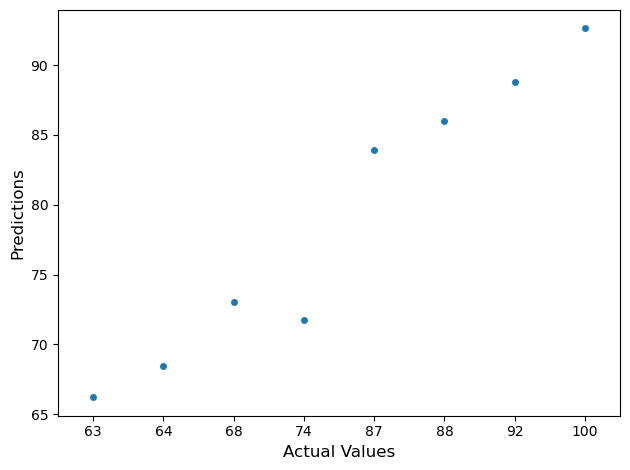

In [142]:
y_pred=Final_mod.predict(x_test)
sns.swarmplot(x = y_test.round(2),y = y_pred)
print('\033[1m'+' Actual Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('Actual Values' , fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.tight_layout()

## Saving Model

In [143]:
import pickle
filename = 'Baseball_Case_Study_model.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))  # Saved model

## Predicting the saved model

In [144]:
import pickle
loaded_model = pickle.load(open('Baseball_Case_Study_model.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

89.92205917405502


In [145]:
conculsion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conculsion

,0,1,2,3,4,5,6,7
Predicted,92.625242,86.026387,73.070268,68.449326,66.218555,88.791429,71.762205,83.897177
Original,100.000000,88.000000,68.000000,64.000000,63.000000,92.000000,74.000000,87.000000
